In [47]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import warnings
import networkx as nx
import random
import seaborn as sns
import time
from collections import deque

style.use("seaborn-white")
plt.rc("figure", figsize=(20, 10))
plt.rc("font", size=20)
plt.rc("legend", fontsize=20)
warnings.filterwarnings("ignore")

In [2]:
# graph representation methods
def get_adj_matrix(v=100, e=200, weights_range=(1, 100)):
    adj_matrix = np.zeros((v, v))
    k = 0
    while k < e:
        i, j = random.randint(0, v - 1), random.randint(0, v - 1)
        if adj_matrix[i, j] == 0 and i != j:
            weight = random.randint(weights_range[0], weights_range[1])
            adj_matrix[i, j] = weight
            adj_matrix[j, i] = weight
            k += 1
    return adj_matrix

def get_adj_list_from_graph(graph):
    return {i[0]: list(i[1].keys()) for i in graph.adjacency()}

In [158]:
adj_matrix = get_adj_matrix(v=100, e=500)
g = nx.from_numpy_matrix(get_adj_matrix())
adj_list = get_adj_list_from_graph(g)

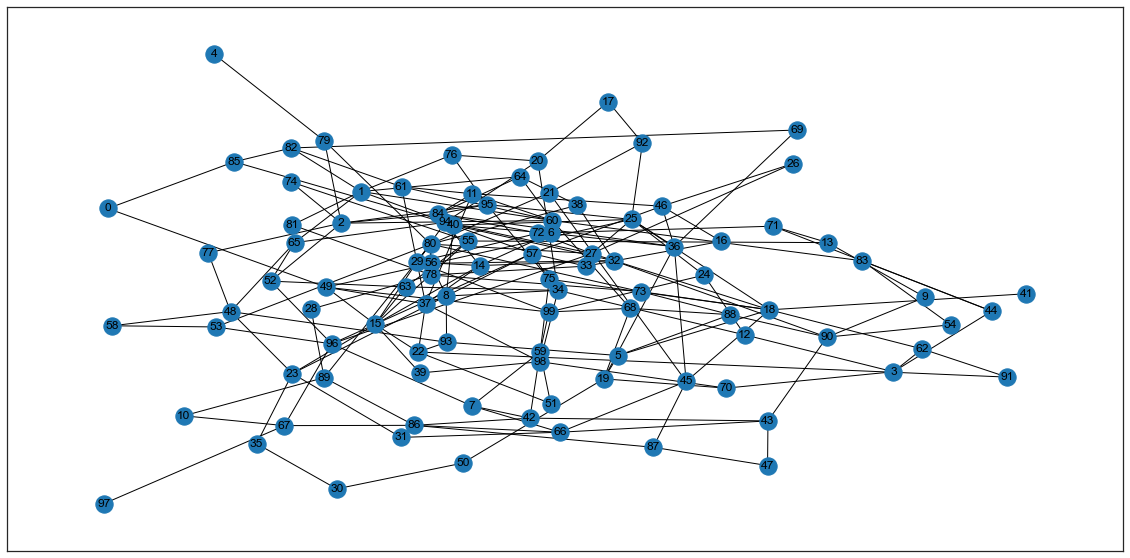

In [159]:
nx.draw_networkx(g, with_labels=True)

In [160]:
def measure_time(method, graph, n_vertices=100, max_minutes=5):    
    times = list()
    exp_start = time.time()
    for n in range(1, 100):
        n_trials = 10
        start = random.randint(0, n_vertices - 1)
        start_time = time.process_time()
        try:
            for i in range(n_trials):
                for end in range(n_vertices):
                    method(graph, start, end)
            times.append((time.process_time() - start_time) / n_trials)
        except OverflowError:
            print(f'Overflow on {n}-th step')
            break
        if time.time() - exp_start > 60 * max_minutes:
            print(f'Time limit ({max_minutes} minutes) exceeded on {n}-th step')
            break
    return times

In [176]:
bf_times = measure_time(nx.bellman_ford_path, g)
d_times = measure_time(nx.dijkstra_path, g)

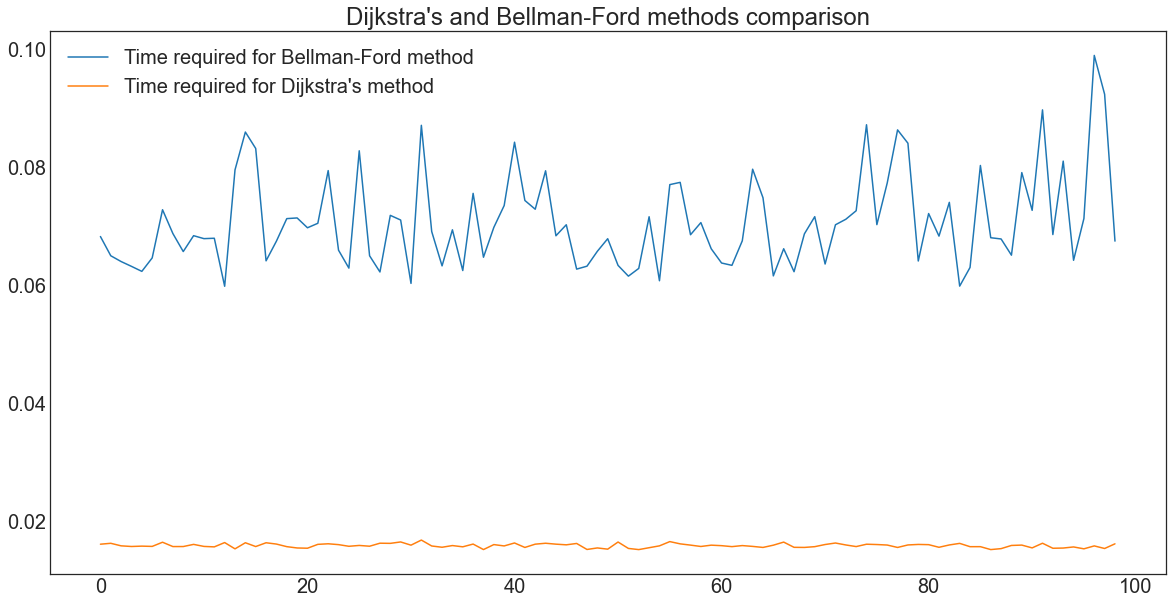

In [178]:
plt.plot(bf_times, label="Time required for Bellman-Ford method")
plt.plot(d_times, label="Time required for Dijkstra's method")
plt.title("Dijkstra's and Bellman-Ford methods comparison")
plt.legend()

In [175]:
for start in range(100):
    for end in range(100):
        bf_path = nx.bellman_ford_path(g, start, end)
        d_path = nx.dijkstra_path(g, start, end)
        if len(bf_path) != len(d_path):
            print(f"start {start}, end {end}, paths lenghts {len(bf_path)} and {len(d_path)}, "
                  f"paths weights: {nx.path_weight(g, bf_path, 'weight')} and "
                  f" {nx.path_weight(g, d_path, 'weight')}")

start 26, end 34, paths lenghts 5 and 6, paths weights: 168.0 and  168.0
start 27, end 34, paths lenghts 4 and 5, paths weights: 159.0 and  159.0
start 28, end 34, paths lenghts 7 and 8, paths weights: 203.0 and  203.0
start 38, end 34, paths lenghts 6 and 7, paths weights: 202.0 and  202.0
start 38, end 61, paths lenghts 6 and 7, paths weights: 152.0 and  152.0
start 53, end 34, paths lenghts 6 and 7, paths weights: 179.0 and  179.0
start 58, end 34, paths lenghts 7 and 8, paths weights: 237.0 and  237.0
start 61, end 38, paths lenghts 6 and 7, paths weights: 152.0 and  152.0
start 62, end 0, paths lenghts 5 and 7, paths weights: 140.0 and  140.0
start 62, end 25, paths lenghts 3 and 5, paths weights: 115.0 and  115.0
start 62, end 32, paths lenghts 5 and 7, paths weights: 166.0 and  166.0
start 62, end 40, paths lenghts 4 and 6, paths weights: 159.0 and  159.0
start 62, end 49, paths lenghts 4 and 6, paths weights: 119.0 and  119.0
start 62, end 56, paths lenghts 6 and 8, paths weigh

In [144]:
def generate_grid(size=(10, 20), n_obstacles=40):
    grid = nx.lattice.grid_2d_graph(size[0], size[1])
    k = 0
    while k < n_obstacles:
        a, b = random.randint(0, size[0] - 1), random.randint(0, size[1] - 1)
        if (a, b) in grid.nodes():
            grid.remove_node((a, b))
            k += 1   
    return grid
    
def plot_grid(grid, size=(10, 20)):
    matrix = np.zeros(size)
    for node in grid.nodes():
        matrix[node] = 1
    sns.heatmap(matrix, cbar=False);

def plot_grid_with_path(grid, path, size=(10, 20), title=None):
    matrix = np.zeros(size)
    for node in grid.nodes():
        matrix[node] = 1
    for node in path:
        matrix[node] = 0.5
    sns.heatmap(matrix, cbar=False);
    plt.title(title)
    plt.show()

In [145]:
grid = generate_grid()

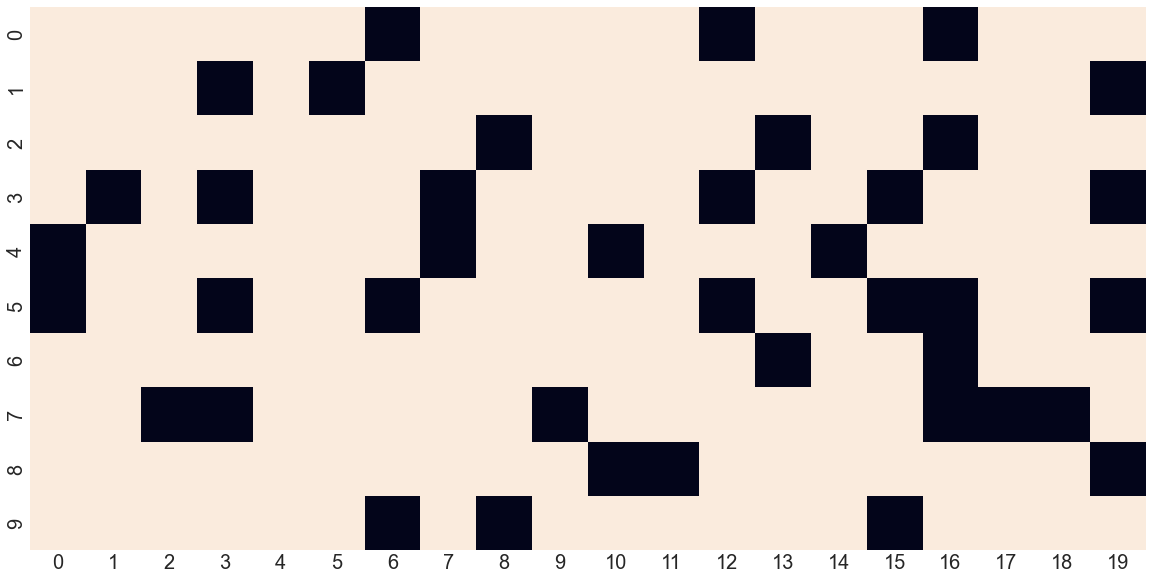

In [146]:
plot_grid(grid)

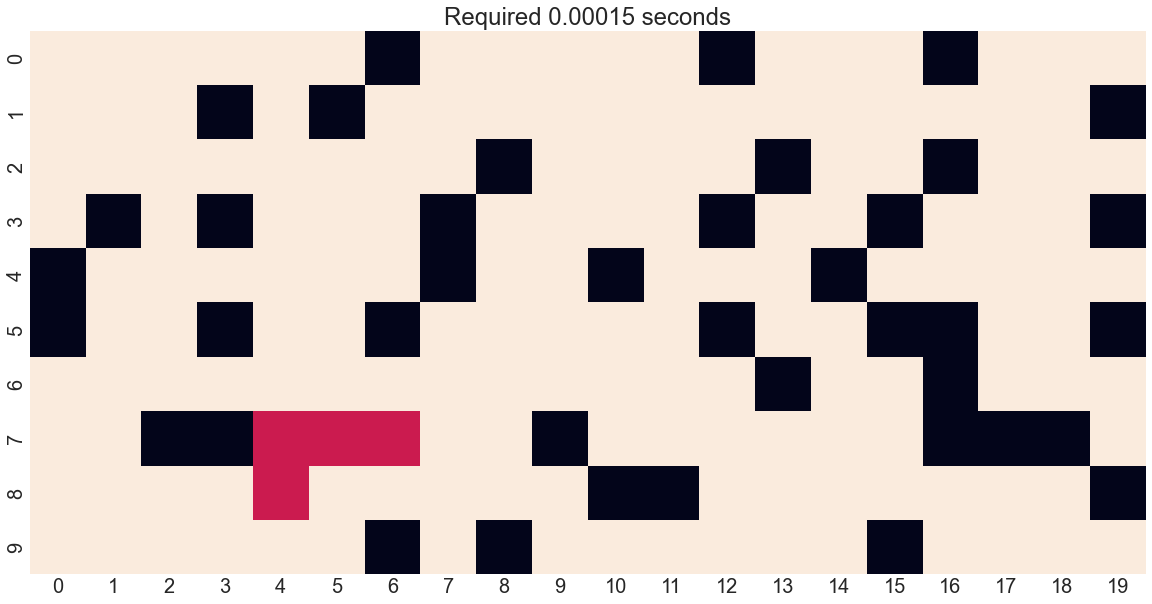

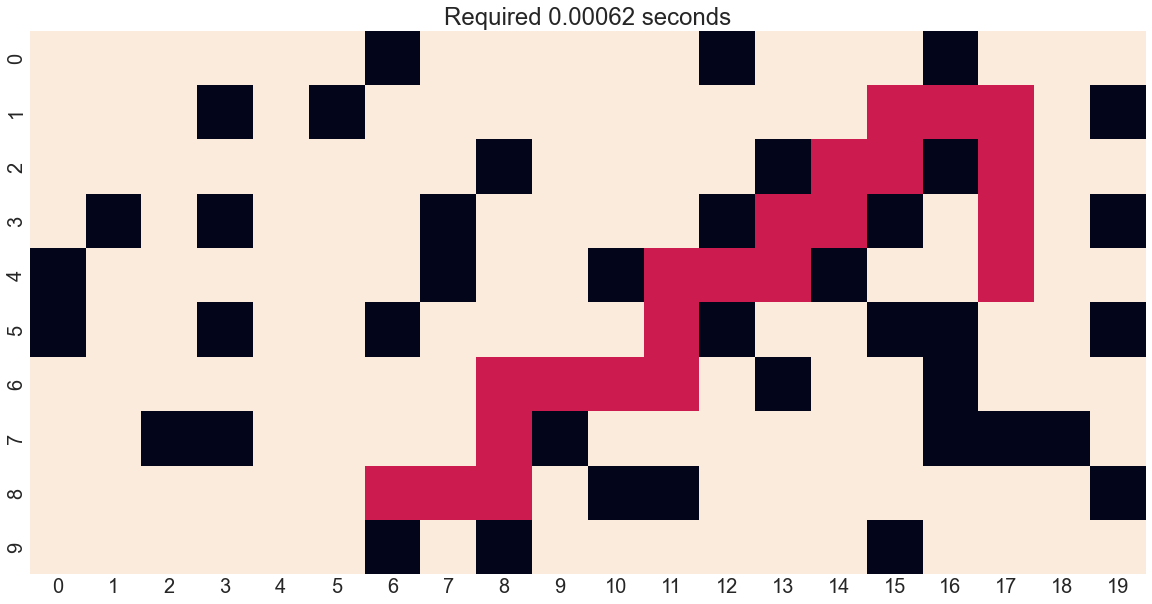

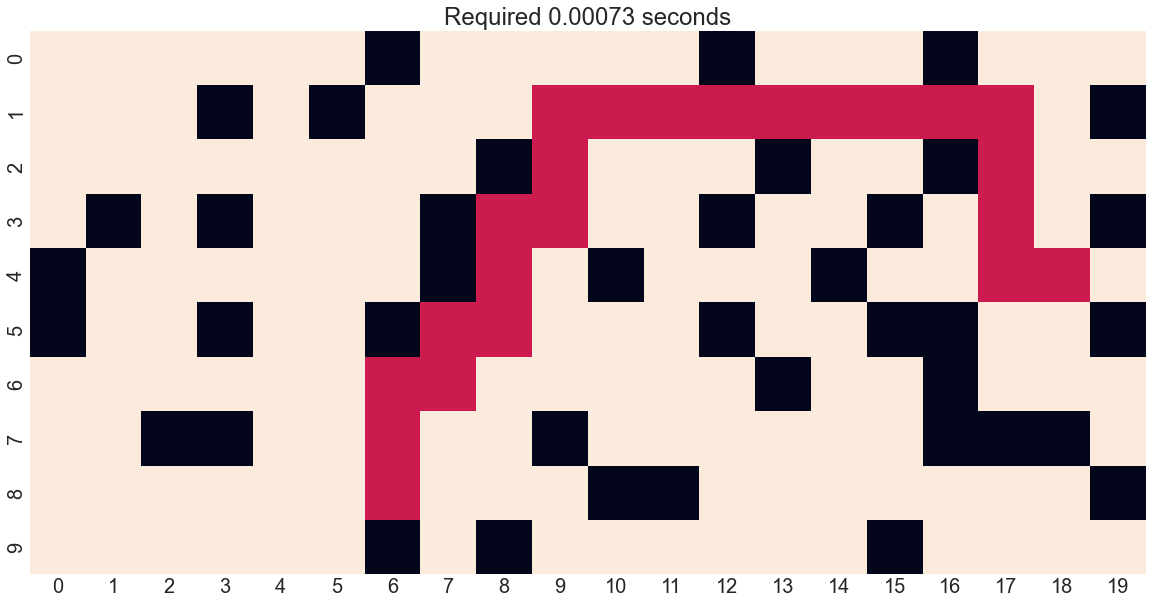

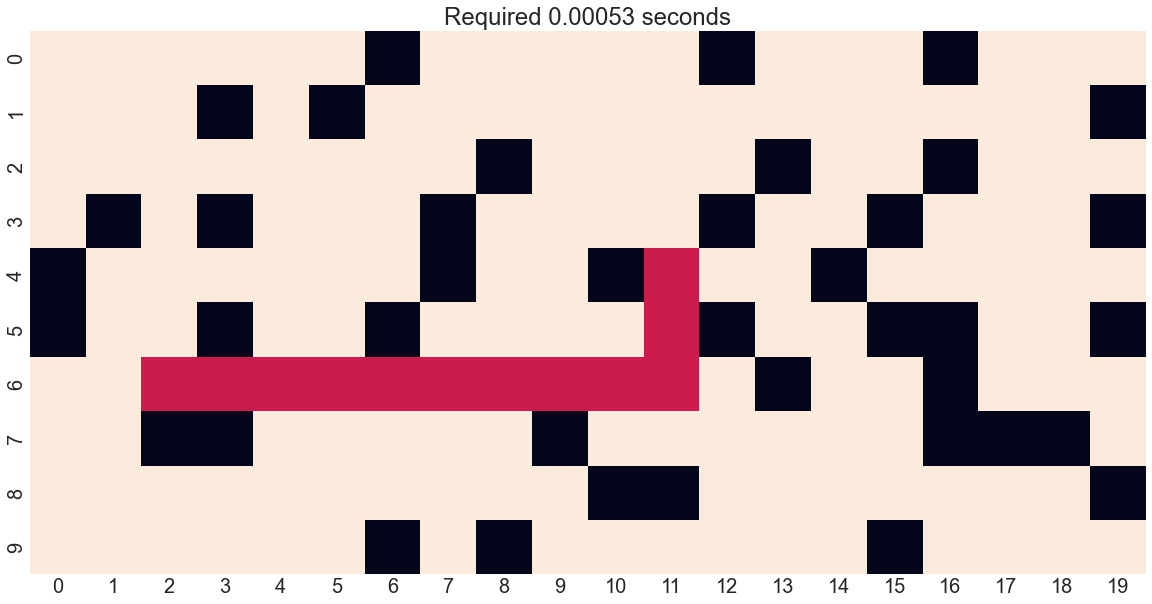

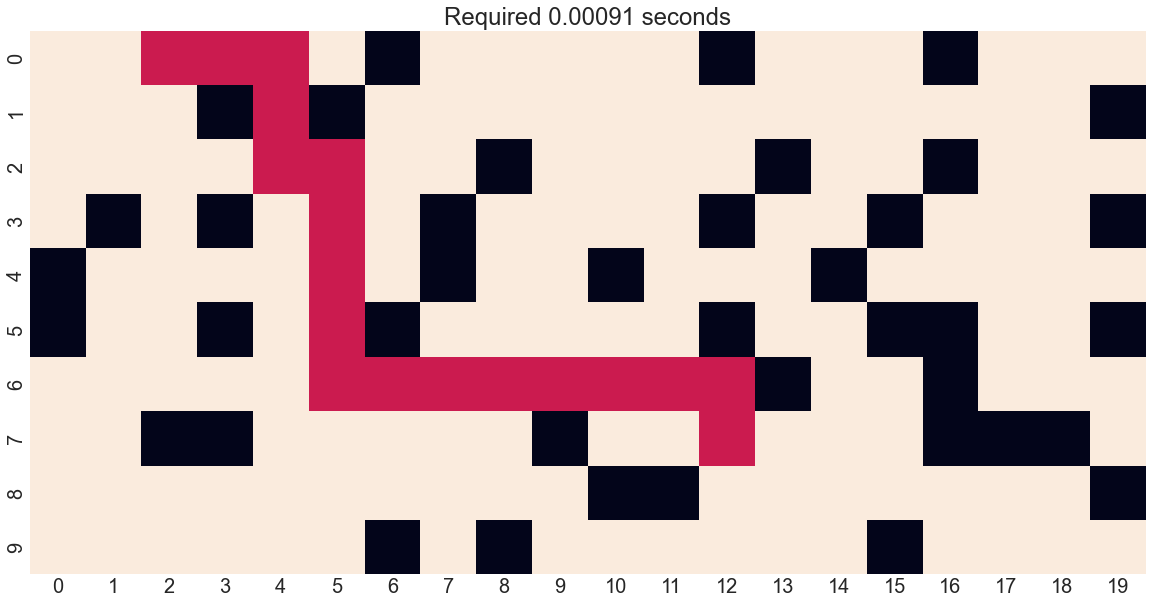

In [151]:
for _ in range(5):
    start, end = random.sample(list(grid.nodes()), 2)
    start_time = time.process_time()
    path = nx.astar_path(grid, start, end)
    req_time = time.process_time() - start_time
    plot_grid_with_path(grid, path, title=f"Required {round(req_time, 5)} seconds")